# Quantum Machine Learning - Notebook

Author: [Nishantak Panigrahi](https://github.com/nishantak)

---

# Quantum Computing

### Qubit

A **qubit** is a vector in a 2-dimensional **Hilbert space**. Unlike classical bits, which can be either `0` or `1`, a qubit can exist in a superposition of these states.


### Hilbert Space

* A **complex vector space** (a vector space over the complex numbers ℂ).

* A **complete inner product space**. This means:

  * There is an inner product ⟨. , .⟩ defined on the space, s.t. for any vector $x \in H$:

    $$
    \| x \| = \sqrt{ \langle x, x \rangle }
    $$

  * The space is **complete** -> dist(x, y) = |x - y| -> there are no "holes" in the space, meaning that it contains the limits of all Cauchy sequences. If a sequence of vectors gets arbitrarily close together, its limit exists in the space.

For an **n-qubit system**, the Hilbert space is:

$$
H = \mathbb{C}^{2^n}
$$

### Qubit Representation | Dirac Notation

The **state** of a qubit can be written as:

$$
| \psi \rangle \in H
$$

where

$$
| \psi \rangle = 
\begin{bmatrix}
\alpha \\
\beta
\end{bmatrix}
$$

with probability amplitudes - $\alpha, \beta \in \mathbb{C}$ and $|\alpha|^2 + |\beta|^2 = 1$  (Born's Rule)

<br>

If the classical set of values that our system can take is, say, {`0`, `1`} - In quantum computing, these classical values correspond to **basis vectors** in $\mathbb{C}^2$:

$$
|0\rangle = 
\begin{bmatrix}
1 \\
0
\end{bmatrix},
\quad
|1\rangle = 
\begin{bmatrix}
0 \\
1
\end{bmatrix}
$$

These vectors form an **orthonormal basis** of $\mathbb{C}^2$, meaning:

$$
\quad \langle 0 | 1 \rangle = 0  ~~~~~~~~~~~~~~~~~~~  (ortho) \\

\langle 0 | 0 \rangle = 1, \quad \langle 1 | 1 \rangle = 1,   ~~~ (normal)
$$


Any qubit state $| \psi \rangle \in \mathbb{C}^2$ can be written as a **linear combination** of these basis vectors:

$$
| \psi \rangle = \alpha |0\rangle + \beta |1\rangle
$$

where:

$$
\alpha, \beta \in \mathbb{C}, \quad |\alpha|^2 + |\beta|^2 = 1
$$

Here:

* $\alpha$ and $\beta$ are complex numbers representing **probability amplitudes**.
* $|\alpha|^2$ is the probability of measuring the qubit in state $|0\rangle$.
* $|\beta|^2$ is the probability of measuring the qubit in state $|1\rangle$.

This is superposition -> qubit existing as both `0` and `1`, until measured.

### Measurement

> *Looking inside the box to see if the cat is alive or dead*

In quantum mechanics, **measurement** is like "opening the box" — the act of observing the system causes the qubit's superposition to **collapse** into one of the basis states.

If our qubit is in the state:

$$
| \psi \rangle = \alpha |0\rangle + \beta |1\rangle
$$

then measuring the qubit *in the $\{ |0\rangle, |1\rangle \}$ basis* results in:

* **Outcome 0** with probability $|\alpha|^2$
* **Outcome 1** with probability $|\beta|^2$

After the measurement, the state collapses to the corresponding basis vector:

$$
| \psi \rangle \to |0\rangle \quad \text{(if outcome 0)}
$$

$$
| \psi \rangle \to |1\rangle \quad \text{(if outcome 1)}
$$

### Entanglement

#### Product states (not entangled)

For an $n$-qubit system, a **basis state** looks like:

$$
|x\rangle = |x_1\rangle \otimes |x_2\rangle \otimes \cdots \otimes |x_n\rangle
$$

where

$$
x_i \in \{0, 1\} ~~~~~~~ (the~classical~set)
$$

These states **are not entangled** because they can be written as a **tensor product** of individual qubit states.

<br>

#### What is entanglement?

A quantum state is **entangled** if:

$$
| \psi \rangle \neq | \psi_1 \rangle \otimes | \psi_2 \rangle \otimes \cdots
$$

> That is, the state **cannot be factorized** into separate states for each qubit.

<br>

**Example: Bell state**

The Bell state:

$$
| \Phi^+ \rangle = \frac{1}{\sqrt{2}} ( |00\rangle + |11\rangle )
$$

This is **entangled** because there are no single-qubit states $| \psi_1 \rangle, | \psi_2 \rangle$ such that:

$$
| \Phi^+ \rangle = | \psi_1 \rangle \otimes | \psi_2 \rangle
$$

---

#### Hadamard and entanglement

The **Hadamard gate** ($H$) is a single-qubit quantum gate that creates superpositions.

All quantum gates are unitary matrices,

In matrix form (in the computational basis $\{|0\rangle, |1\rangle\}$):

$$
H = \frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix}
$$

**Unitary property**

A matrix $U$ is **unitary** if:

$$
U^\dagger U = U U^\dagger = I
$$

where $U^\dagger$ is the conjugate transpose (for $H$, since it’s real, just the transpose).


$$
H H^\dagger = H^\dagger H = H H = I
$$

<br>

The Hadamard gate acts as:

$$
H |0\rangle = \frac{1}{\sqrt{2}} ( |0\rangle + |1\rangle )
$$

$$
H |1\rangle = \frac{1}{\sqrt{2}} ( |0\rangle - |1\rangle )
$$

This creates superposition of equal probabilties, from a definite state

To create a Bell state:
1. Apply Hadamard on the first qubit:

$$
H |0\rangle = \frac{1}{\sqrt{2}}( |0\rangle + |1\rangle )
$$

2. Apply CNOT (control = qubit 1, target = qubit 2):

$$
\frac{1}{\sqrt{2}} ( |00\rangle + |11\rangle )
$$

Now we have entanglement: the two qubits' outcomes are correlated (beyond Local Hidden Variable)

<br>

**Measurement in Hadamard basis**

When we measure in the **Hadamard basis** (the $|+\rangle$, $|-\rangle$ basis):

$$
|+\rangle = \frac{1}{\sqrt{2}} ( |0\rangle + |1\rangle ),
\quad
|-\rangle = \frac{1}{\sqrt{2}} ( |0\rangle - |1\rangle )
$$

We’re asking:
*"Is the qubit in a state more like $|+\rangle$ or more like $|-\rangle$?"*

$$
P(+) = | \langle + | \psi \rangle |^2
$$

$$
P(-) = | \langle - | \psi \rangle |^2
$$

This lets us see quantum effects (like entanglement) **that are invisible in the standard computational basis** $\{ |0\rangle, |1\rangle \}$ (Hides the phase, coherence etc.)

<br>

Consider the **Bell state**:

$$
| \Phi^+ \rangle = \frac{1}{\sqrt{2}}( |00\rangle + |11\rangle )
$$

If we measure **qubit A** in the Hadamard basis:

* The outcome is **random** (we might get $|+\rangle$ or $|-\rangle$).

* But whatever we get, qubit B will be correlated **in the same Hadamard basis**

$$
|00\rangle = \frac{1}{2} \big( (|+\rangle + |-\rangle)(|+\rangle + |-\rangle) \big)
$$

$$
|11\rangle = \frac{1}{2} \big( (|+\rangle - |-\rangle)(|+\rangle - |-\rangle) \big)
$$

Add them up:

$$
| \Phi^+ \rangle = \frac{1}{\sqrt{2}} \left( |00\rangle + |11\rangle \right)
= \frac{1}{\sqrt{2}} \cdot \frac{1}{2}
\left(
(|+\rangle + |-\rangle)(|+\rangle + |-\rangle) + (|+\rangle - |-\rangle)(|+\rangle - |-\rangle)
\right)
$$

Simplify:

$$
= \frac{1}{\sqrt{2}} \cdot \frac{1}{2}
\left(
2 |+\rangle |+\rangle + 2 |-\rangle |-\rangle
\right)
= \frac{1}{\sqrt{2}} ( |+\rangle |+\rangle + |-\rangle |-\rangle )
$$

Meaning, 

* If we get $|+\rangle$, qubit B **collapses to $|+\rangle$**.
* If we get $|-\rangle$, qubit B **collapses to $|-\rangle$**.

The measurement outcomes are **perfectly correlated**, *even though we chose to measure in the Hadamard basis*.
This correlation **demonstrates entanglement** — their states are linked in *any basis* we choose.

# 1 Qubit Simulator

In [ ]:
# import
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

In [23]:
# --- SETUP: 1-QUBIT DEVICE FOR SAMPLING ---
dev = qml.device("default.qubit", wires=1, shots=2048)

# --- DEFINE QUANTUM CIRCUIT ---
@qml.qnode(dev)
def hadamard_circuit():
    qml.Hadamard(wires=0)
    return qml.sample(qml.PauliZ(0))  # Measure in Z basis: +1 = |0>, -1 = |1>

Quantum circuit diagram:



(<Figure size 400x200 with 1 Axes>, <Axes: >)

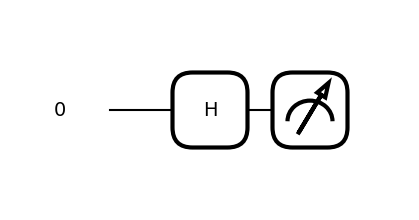

In [24]:
# print circuit
print("Quantum circuit diagram:\n")
qml.draw_mpl(hadamard_circuit)()

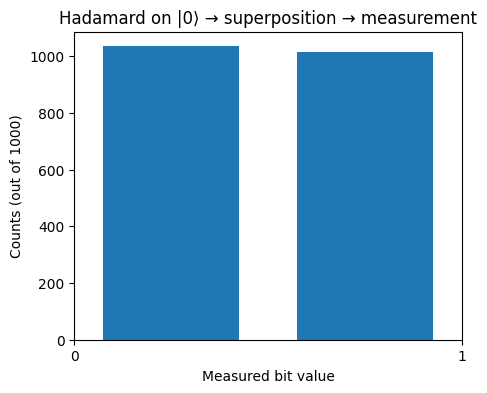

In [25]:
# run cicuit
samples = hadamard_circuit()
bit_samples = (samples == -1).astype(int)

# plot histogram of bit values

plt.figure(figsize=(5,4))
plt.hist(bit_samples, bins=2, rwidth=0.7)
plt.xticks([0,1])
plt.xlabel("Measured bit value")
plt.ylabel("Counts (out of 1000)")
plt.title("Hadamard on |0⟩ → superposition → measurement")
plt.show()

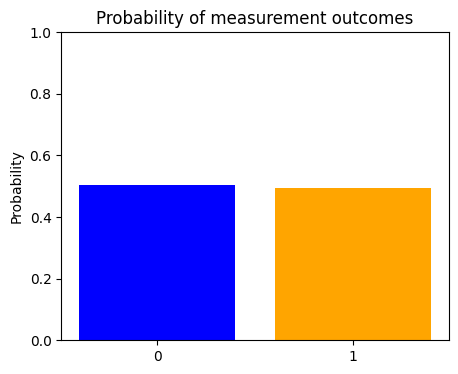

In [26]:
# plot probabilities of measurement outcomes
prob_0 = np.mean(bit_samples == 0)
prob_1 = np.mean(bit_samples == 1)

plt.figure(figsize=(5,4))
plt.bar(['0', '1'], [prob_0, prob_1], color=['blue', 'orange'])
plt.ylabel("Probability")
plt.title("Probability of measurement outcomes")
plt.ylim(0,1)
plt.show()

# Entanglement Simulation

Bell state circuit diagram:



(<Figure size 500x300 with 1 Axes>, <Axes: >)

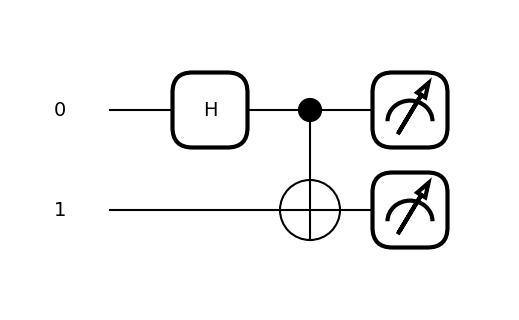

In [27]:
# --- Setup 2: BELL STATE FOR ENTANGLEMENT ---
dev2 = qml.device("default.qubit", wires=2, shots=1000)

@qml.qnode(dev2)
def bell_circuit():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,1])
    return qml.sample(qml.PauliZ(0)), qml.sample(qml.PauliZ(1))

samples0, samples1 = bell_circuit()
bit0 = (samples0 == -1).astype(int)
bit1 = (samples1 == -1).astype(int)

# print circuit
print("Bell state circuit diagram:\n")
qml.draw_mpl(bell_circuit)()

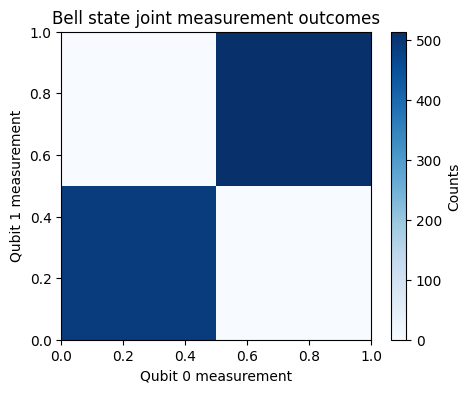

In [28]:
# 2D histogram of joint measurement outcomes
plt.figure(figsize=(5,4))
plt.hist2d(bit0, bit1, bins=[2,2], range=[[0,1],[0,1]], cmap='Blues')
plt.xlabel("Qubit 0 measurement")
plt.ylabel("Qubit 1 measurement")
plt.title("Bell state joint measurement outcomes")
plt.colorbar(label="Counts")
plt.show()

# Machine Learning

Goal: **Find patterns in data so we can make accurate predictions or decisions.**

Given a dataset:

$$
(x, y)
$$

the machine learns a function:

$$
f(x; \theta) \approx y
$$

where:

* $x$ = input features (e.g., size, number of rooms)
* $y$ = target (e.g., house price, class label)
* $\theta = \{w, b\}$ = model parameters (weights, biases)

### Decision making unit

```
Input Vector (x): features of raw data  
           |  
           v  
   +-------------------[+  
   | Weight Matrix (w)  |  
   |       *            |  
   |       x            |  
   |                    |  
   |       +            |  
   |  Bias Matrix (b)   |  
   +--------------------+  
           |  
           v  
   +--------------------+  
   |   Activation       |  
   |   Function (f)     |  
   +--------------------+  
           |  
           v  
        Output  
     y = f(w*x + b)  
```

### Training

* The model adjusts **$\theta = \{w, b\}$** using a loss function (penalty for how far prediction is from true) + optimization (e.g. gradient descent).
* The goal: minimize the difference between predicted $y$ and true $y$.
* The **activation function** $f$ lets us bend or curve the decision boundary:  $~w \cdot x + b$, so the model can fit complex data patterns amd bend decision boundaries

* This structure (input → weighted sum + bias → activation → output) is **one decision-making entity (a neuron)**.

**We can us these entities**:

* Stack them form larger models (neural networks), to learn hierarchical or more abstract patterns
* Switch activation functions -> make different kinds of models (linear, nonlinear, deep, regression, etc.)

### Two Circles Data

A synthetic dataset where points belong to **two concentric circles**:

$$
\text{CircleData}(x_1, x_2) =
\begin{cases}
1 & \text{if } (x_1, x_2) \text{ lies on outer circle} \\
0 & \text{if } (x_1, x_2) \text{ lies on inner circle}
\end{cases}
$$

Two circles defines a dataset where:

> Data points $(x_1, x_2)$ are sampled along two circles:
>
> * **Inner circle** -> class 0
> * **Outer circle** -> class 1

The class label $y$ depends on the distance from the origin: $~ r = \sqrt{x_1^2 + x_2^2}$

* If $r$ <= $r_{inner}$ → **inner circle** → $y = 0$
* If $r$ > $r_{inner}$ → **outer circle** → $y = 1$


**Visualizing in 2D space**

This setup forms **concentric circular patterns**, where linear classifiers fail because no straight line can separate the two classes globally.

If we plot the data:

* Points near the origin -> **inner circle -> class 0**
* Points further out -> **outer circle -> class 1**

The positive and negative classes form a **ring-shaped pattern**:

**Why does linear fail on two circles?**

A **linear model** tries to find a straight line (hyperplane) that separates classes:

$$
w_1 x_1 + w_2 x_2 + b = 0
$$

But if we look at the circles plot:

* No **single straight line** can separate inner circle (0) from outer circle (1)
* The classes are nested -> we’d need a **curved line boundary**

<br>

So, We

* **Add a `hidden` layer:** A fancy term for linear combination of multiple neurons to combine linear parts so we have a complex decision boundary instead of just 1 line.

* Each neuron **learns a part of the solution**; each layer combines output of previous layer to **learn heirarchial patterns.**

* **Apply a non-linear activation (e.g., tanh, relu)** -> This lets the model **curve, bend, or combine linear parts (neurons)**

**Structure of Two Circles Neural Network**

The neural network $N_\theta$ is constructed with:

* an input layer (receiving input vector $x = (x_1, x_2)$)
* one or more hidden layers (e.g. with 2 or more neurons)
* non-linear activation functions (e.g. $\tanh$ or ReLU)
* a linear output layer that yields the prediction $\hat{y}$

<br>
We have,

$$
N_\theta~(x1, x2) = f\big( W^{L} * f\big( W^{L−1} * f( ... f( W^{1} * (x1, x2) + b^{1} ) ... ) + b^{L−1} \big) + b^{L} \big)
$$

where:

* $L-1$ is the number of hidden layers

* Hidden Layers, $h^{i} = f(W^{i} \cdot h^{i−1} + b^{i})$: for each neuron in layer $i$; $W$ and $b$ are weight matrix and bias vector respectively

* $f$: non-linear activation (e.g. $\tanh$, ReLU)


Essentially, for two circles:
* First hidden neuron: learns one part of the circular split

* Second hidden neuron: learns another part

* Output combines those -> correct classes


In [99]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns


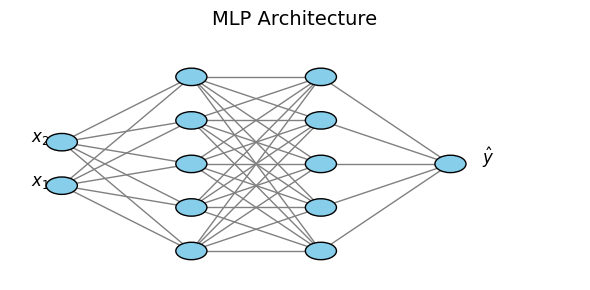

In [116]:
# --- Schematic for a simple MLP with 2 input neurons, 2 hidden layers with 5 neurons each, and 1 output neuron ---
def draw_mlp_architecture(input_size=2, hidden_sizes=[5, 5], output_size=1):
    layer_sizes = [input_size] + hidden_sizes + [output_size]
    layer_count = len(layer_sizes)

    fig, ax = plt.subplots(figsize=(6, 3))
    ax.axis('off')
    ax.set_title("MLP Architecture", fontsize=14)

    v_spacing = 1.5
    h_spacing = 2.5

    positions = {}

    for i, layer_size in enumerate(layer_sizes):
        layer_x = i * h_spacing
        top_y = (max(layer_sizes) - layer_size) * v_spacing / 2
        for j in range(layer_size):
            neuron_y = j * v_spacing + top_y
            circle = plt.Circle((layer_x, neuron_y), 0.3, color='skyblue', ec='k', zorder=4)
            ax.add_patch(circle)
            positions[(i, j)] = (layer_x, neuron_y)

            # Add labels
            if i == 0:
                ax.text(layer_x - 0.6, neuron_y, f"$x_{{{j+1}}}$", fontsize=12)
            elif i == layer_count - 1:
                ax.text(layer_x + 0.6, neuron_y, "$\\hat{y}$", fontsize=12)

    # Draw connections
    for i in range(layer_count - 1):
        for j in range(layer_sizes[i]):
            for k in range(layer_sizes[i+1]):
                x1, y1 = positions[(i, j)]
                x2, y2 = positions[(i+1, k)]
                ax.plot([x1, x2], [y1, y2], 'gray', linewidth=1, zorder=1)

    ax.set_xlim(-1, layer_count * h_spacing)
    ax.set_ylim(-1, max(layer_sizes) * v_spacing)
    plt.tight_layout()
    plt.show()

draw_mlp_architecture(input_size=2, hidden_sizes=[5, 5], output_size=1)

In [ ]:
# --- HELPER: Plot decision boundaries ---
def plot_decision_boundary(clf, X, y, title, factor=0.5):
    # Grid
    xx, yy = np.meshgrid(
        np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 500),
        np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 500)
    )
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    # Get probabilities or decision function
    if hasattr(clf, "predict_proba"):
        probs = clf.predict_proba(grid)[:,1].reshape(xx.shape)
    else:
        probs = clf.decision_function(grid).reshape(xx.shape)
    
    # Plot contour
    plt.figure(figsize=(6,6))
    plt.contourf(xx, yy, probs, levels=25, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')

    # Overlay true circles
    circle1 = plt.Circle((0,0), factor, color='black', fill=False, linestyle='--', linewidth=2)
    circle2 = plt.Circle((0,0), 2*factor, color='black', fill=False, linestyle='--', linewidth=2)
    plt.gca().add_patch(circle1)
    plt.gca().add_patch(circle2)

    plt.title(title)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.axis("equal")
    plt.show()

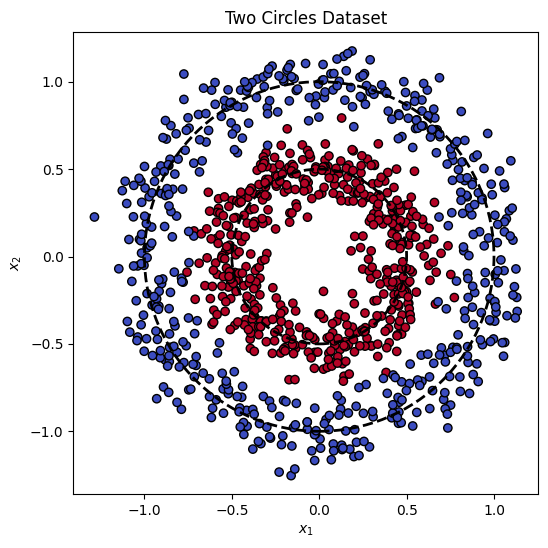

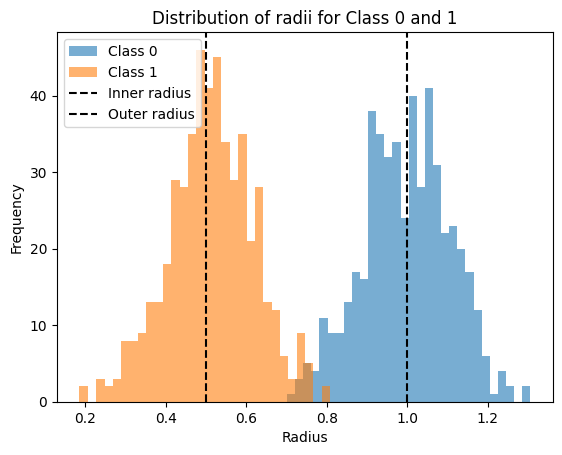

In [78]:
# --- Generate two circles dataset ---
X, y = make_circles(n_samples=1000, noise=0.11, factor=0.5, random_state=42)

# Plot dataset
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
circle1 = plt.Circle((0,0), 0.5, color='black', fill=False, linestyle='--', linewidth=2)
circle2 = plt.Circle((0,0), 1.0, color='black', fill=False, linestyle='--', linewidth=2)
plt.gca().add_patch(circle1)
plt.gca().add_patch(circle2)
plt.title("Two Circles Dataset")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.axis("equal")
plt.show()

radii = np.linalg.norm(X, axis=1)
plt.hist(radii[y==0], bins=30, alpha=0.6, label='Class 0')
plt.hist(radii[y==1], bins=30, alpha=0.6, label='Class 1')
plt.axvline(0.5, color='black', linestyle='--', label='Inner radius')
plt.axvline(1.0, color='black', linestyle='--', label='Outer radius')
plt.xlabel("Radius")
plt.ylabel("Frequency")
plt.legend()
plt.title("Distribution of radii for Class 0 and 1")
plt.show()


In [79]:
# --- Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Logistic Regression Test Accuracy: 0.460


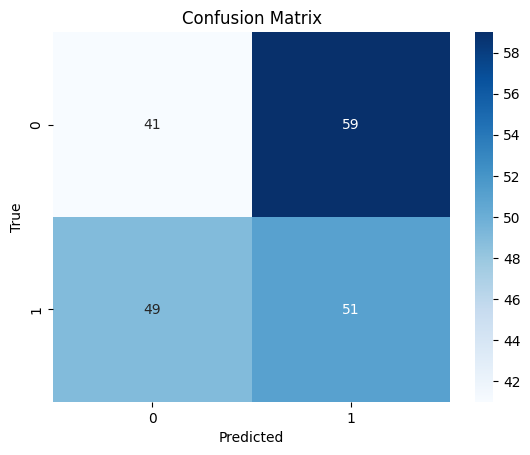

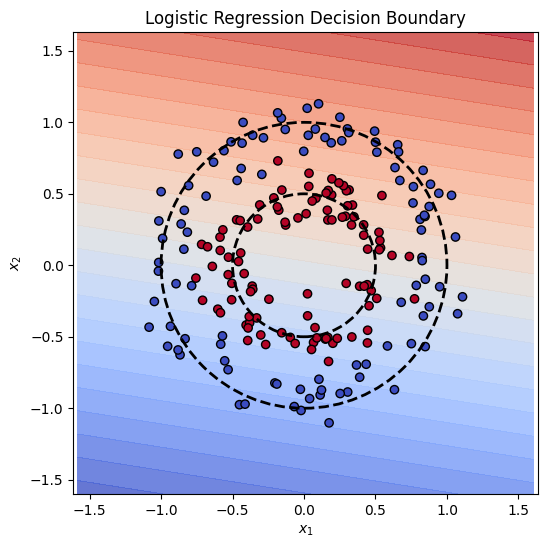

In [105]:
# --- Linear model: Logistic regression --- y = sigmoid(wx + b) || FAILS
lin_clf = LogisticRegression()
lin_clf.fit(X_train, y_train)

# --- Evaluation & Accuracy ---
lin_preds = lin_clf.predict(X_test)
lin_acc = accuracy_score(y_test, lin_preds)
print(f"Logistic Regression Test Accuracy: {lin_acc:.3f}")

# --- Confusion matrix [ [true negatives, false positives], [false negatives, true positives] ] ---
cm = confusion_matrix(y_test, lin_preds)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Plot linear
plot_decision_boundary(lin_clf, X_test, y_test, "Logistic Regression Decision Boundary", factor=0.5)

Neural Network Test Accuracy: 0.950


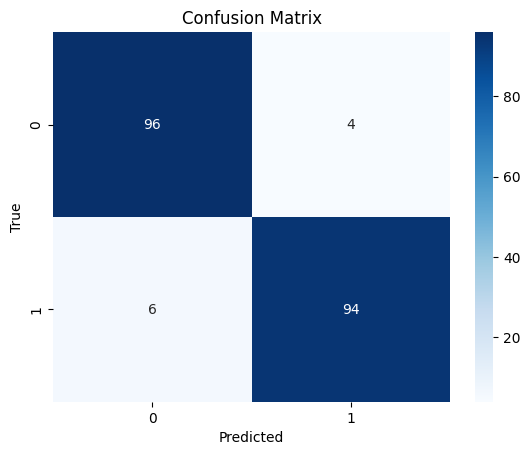

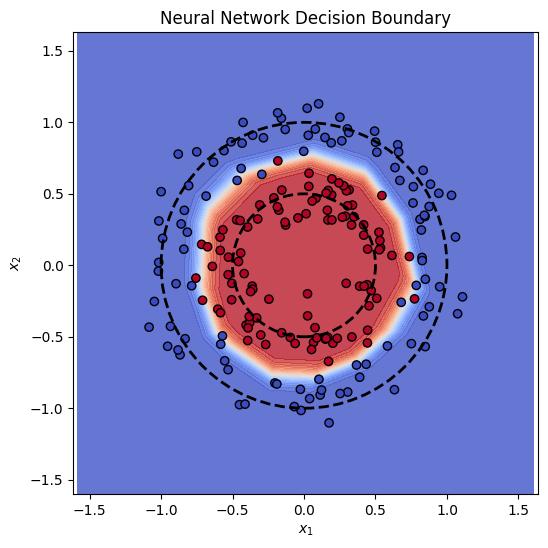

In [ ]:
# --- Define and train neural network: Multi-Layer Perceptron (MLP) --- || WORKS
mlp_clf = MLPClassifier(hidden_layer_sizes=(10,10), activation='relu', max_iter=500, random_state=42)
mlp_clf.fit(X_train, y_train)

# --- Evaluation & Accuracy ---
mlp_preds = mlp_clf.predict(X_test)
mlp_acc = accuracy_score(y_test, mlp_preds)
print(f"Neural Network Test Accuracy: {mlp_acc:.3f}")

# --- Confusion matrix ---
cm = confusion_matrix(y_test, mlp_preds)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


# --- Plot decision boundary ---
plot_decision_boundary(mlp_clf, X_test, y_test, "Neural Network Decision Boundary", factor=0.5)

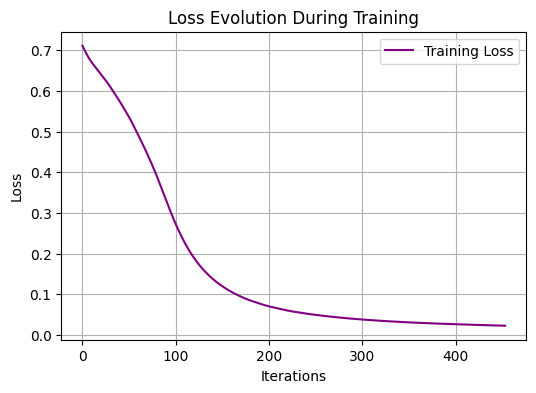

In [ ]:
# Plot training loss over epochs
plt.figure(figsize=(6,4))
plt.plot(mlp_clf.loss_curve_, label="Training Loss", color='purple')
plt.title("Loss Evolution During Training")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

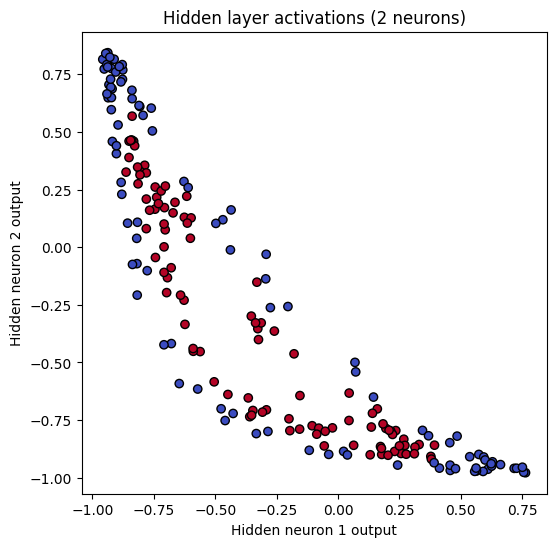

In [98]:
# --- Visualize hidden layer activations ---
hidden_layer_weights = mlp_clf.coefs_[0]
hidden_layer_biases = mlp_clf.intercepts_[0]
activations = np.tanh(X_test@hidden_layer_weights + hidden_layer_biases)

plt.figure(figsize=(6,6))
plt.scatter(activations[:,0], activations[:,1], c=y_test, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title("Hidden layer activations (2 neurons)")
plt.xlabel("Hidden neuron 1 output")
plt.ylabel("Hidden neuron 2 output")
plt.show()

# Quantum Machine Learning

## Hybrid Quantum-Classical Neural Network (QCNN)

### Classical Neural Network (NN)
- Performs part of the computation, like feature extraction.

- Operates in conventional vector space (ℝⁿ), using tools like ReLU, tanh, dense layers, etc.

### Parameterized Quantum Circuit (PQC) to encode data
- A variational quantum circuit with trainable gates (RX, RY, RZ, etc.)

- Takes classical features, encodes them into quantum states, processes them via rotaion, entangling gates, and measures the output.

- Outputs scalar or multi-qubit expectation values for classification.

| Classical                        | Quantum                                                   |
| -------------------------------- | --------------------------------------------------------- |
| Efficient on CPUs/GPUs           | Leverages quantum parallelism                             |
| Good for learning local patterns | Can represent **non-local correlations** via entanglement |
| Large scale (millions of params) | Small scale (few qubits), but **expressive** -> capture more complex relations             |

<br>

**Motivation:**
Quantum circuits can represent certain functions more efficiently (with fewer parameters or depth) than classical models — in theory — especially those involving:
- Encode and entangle multiple features in superposition

- Simultaneously represent multiple basis states -> richer function space

- Generalize complex decision boundaries more efficiently using linear number of gates (in theory)


For example:
- In small datasets with complex topology (like circles), quantum models may offer better inductive bias -> prior assumption (function space) that data has complex correlations

- Some functions require exponential classical resources to approximate, but linear depth quantum circuits can represent them

### Working

Input: $x = [x_1, x_2]$

#### 1. Classical preprocessing:

```math
h = \tanh(W \cdot x + b)
```

Now we have a new feature vector `h` (say 3 numbers), which we pass to quantum.


#### 2. Quantum encoding:

We send `h` into a quantum circuit by rotating qubits -> write data into quantum states, like in a `Bloch Sphere`:

$$
|ψ(x)⟩ = RX(h_1) \cdot RX(h_2) \cdot RX(h_3) \cdot |000⟩
$$ 

Where, |000⟩ is starting state `0, 0, 0` of the three qubits

This makes a quantum state that **represents your data**. These are like neural network weights -> the angles of rotations are learned during training.


#### 3. Quantum processing:

Apply quantum gates:

* **Rotation gates**: RX, RY, RZ (with trainable angles) || This is like applying a weight to a neuron

* **Entangling gates**: like CNOT -> Represent more complex relationships || This is like combining many neurons

This is a "quantum layer" that gives the final quantum state based on trainable parameters:

$$
|\psi(x, \theta)⟩ = U(\theta) |\psi(x)⟩
$$

Where U is a trainable unitary operation, and $\theta$ is a trainable parameter

#### 4. Measurement:

At the end, we **measure** a qubit (or more), in Z basis -> more like |0> or |1> ?:

$$
\hat{y} = \langle Z_0 \rangle = ⟨\psi| Z ⊗ I ⊗ I |\psi⟩
$$

> This is measuring the first qubit and not the other two.

This gives a number between `-1` and `1`. We **rescale** it to \[0, 1] to predict class.

### Benefit?

* The **quantum circuit acts like a complex non-linear layer**.
* It can model patterns **classical networks may need more layers** for.
* In theory, some functions may be **easier** to learn quantumly.

> On current noisy quantum hardware (NISQ era), this advantage is not guaranteed and depends on the problem and encoding.

In [164]:
# imports
import pennylane as qml
from pennylane import numpy as np
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [165]:
# --- Generate dataset ---
X, y = make_circles(n_samples=1000, noise=0.11, factor=0.5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -- Scale to [0, π] for quantum encoding --
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [166]:
# -- Define quantum circuit --
n_qubits = 2
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def quantum_circuit(inputs, weights):
    # Encode classical input using angle embedding
    qml.templates.AngleEmbedding(inputs, wires=range(n_qubits))
    # Variational layer: entangle and rotate
    qml.templates.StronglyEntanglingLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

In [167]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

# -- Define hybrid model --

# Setup shape of quantum weights: (n_layers, n_wires, 3)
n_layers = 3
weight_shapes = {"weights": (n_layers, n_qubits, 3)}

qlayer = qml.qnn.TorchLayer(quantum_circuit, weight_shapes)

class HybridQNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.cl_in = nn.Linear(2, 2)         # Classic -> Quantum
        self.q_layer = qlayer                # Quantum Layer
        self.cl_out = nn.Linear(2, 1)        # Quantum -> Output
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.cl_in(x)
        x = self.q_layer(x)
        x = self.cl_out(x)
        x = self.sigmoid(x)
        return x

In [174]:
# Convert data
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
y_train_torch = torch.tensor(y_train.reshape(-1,1), dtype=torch.float32)

X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_test_torch = torch.tensor(y_test.reshape(-1,1), dtype=torch.float32)

# Create data loader
train_loader = DataLoader(TensorDataset(X_train_torch, y_train_torch), batch_size=32, shuffle=True)

# Initialize model
model = HybridQNN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.BCELoss()

train_losses = []

for epoch in range(100):
    total_loss = 0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        preds = model(xb)
        loss = loss_fn(preds, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"Epoch {epoch+1} - Loss: {avg_loss:.4f}")


Epoch 1 - Loss: 0.6901
Epoch 2 - Loss: 0.6421
Epoch 3 - Loss: 0.5433
Epoch 4 - Loss: 0.4672
Epoch 5 - Loss: 0.4177
Epoch 6 - Loss: 0.3732
Epoch 7 - Loss: 0.3302
Epoch 8 - Loss: 0.2955
Epoch 9 - Loss: 0.2659
Epoch 10 - Loss: 0.2436
Epoch 11 - Loss: 0.2265
Epoch 12 - Loss: 0.2123
Epoch 13 - Loss: 0.1965
Epoch 14 - Loss: 0.1845
Epoch 15 - Loss: 0.1743
Epoch 16 - Loss: 0.1640
Epoch 17 - Loss: 0.1541
Epoch 18 - Loss: 0.1470
Epoch 19 - Loss: 0.1406
Epoch 20 - Loss: 0.1329
Epoch 21 - Loss: 0.1272
Epoch 22 - Loss: 0.1243
Epoch 23 - Loss: 0.1192
Epoch 24 - Loss: 0.1150
Epoch 25 - Loss: 0.1119
Epoch 26 - Loss: 0.1048
Epoch 27 - Loss: 0.1051
Epoch 28 - Loss: 0.1013
Epoch 29 - Loss: 0.0969
Epoch 30 - Loss: 0.0949
Epoch 31 - Loss: 0.0930
Epoch 32 - Loss: 0.0885
Epoch 33 - Loss: 0.0866
Epoch 34 - Loss: 0.0865
Epoch 35 - Loss: 0.0824
Epoch 36 - Loss: 0.0816
Epoch 37 - Loss: 0.0790
Epoch 38 - Loss: 0.0775
Epoch 39 - Loss: 0.0764
Epoch 40 - Loss: 0.0736
Epoch 41 - Loss: 0.0704
Epoch 42 - Loss: 0.0714
E

Hybrid QML Test Accuracy: 0.970


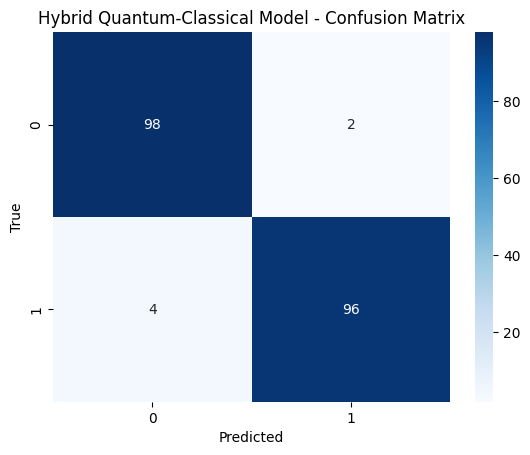

In [175]:
model.eval()
with torch.no_grad():
    preds = model(X_test_torch)
    preds_cls = (preds.numpy() > 0.5).astype(int).flatten()

acc = accuracy_score(y_test, preds_cls)
print(f"Hybrid QML Test Accuracy: {acc:.3f}")

# Confusion matrix
cm = confusion_matrix(y_test, preds_cls)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Hybrid Quantum-Classical Model - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

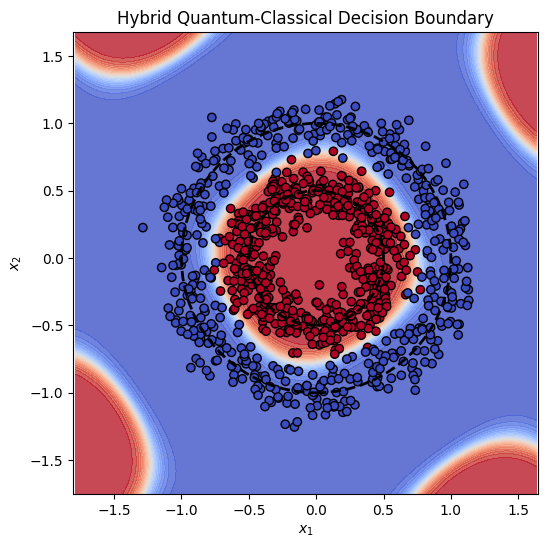

In [179]:
def plot_decision_boundary_hybrid(model, X, y, title):
    xx, yy = np.meshgrid(
        np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 300),
        np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 300)
    )
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_std = scaler.transform(grid)
    grid_tensor = torch.tensor(grid_std, dtype=torch.float32)
    
    with torch.no_grad():
        preds = model(grid_tensor)
        preds_cls = preds.numpy().reshape(xx.shape)

    plt.figure(figsize=(6,6))
    plt.contourf(xx, yy, preds_cls, levels=25, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    circle1 = plt.Circle((0,0), 0.5, color='black', fill=False, linestyle='--', linewidth=2)
    circle2 = plt.Circle((0,0), 1.0, color='black', fill=False, linestyle='--', linewidth=2)
    plt.gca().add_patch(circle1)
    plt.gca().add_patch(circle2)
    plt.title(title)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.axis("equal")
    plt.show()

plot_decision_boundary_hybrid(model, X, y, "Hybrid Quantum-Classical Decision Boundary")

(<Figure size 500x300 with 1 Axes>, <Axes: >)

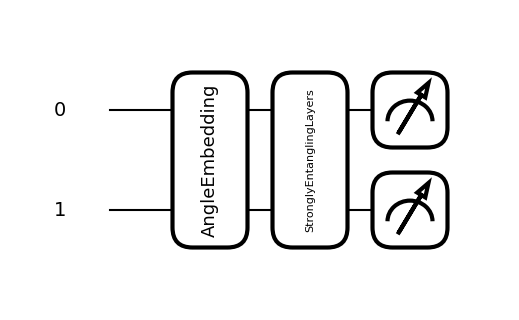

In [177]:
# Show the actual quantum circuit
qml.draw_mpl(quantum_circuit)([0.1, 0.2], np.random.rand(n_layers, n_qubits, 3))

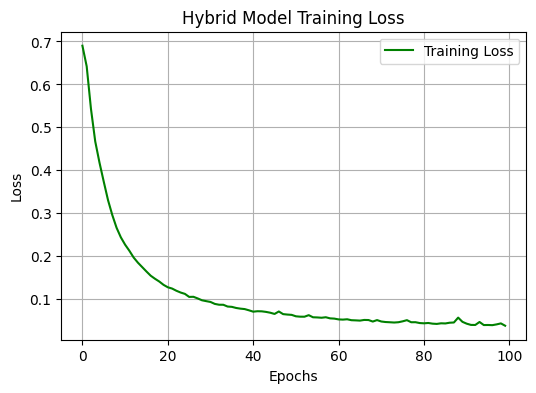

In [178]:
# --- Plot loss ---
plt.figure(figsize=(6,4))
plt.plot(train_losses, label="Training Loss", color='green')
plt.title("Hybrid Model Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()


### TO-DO: Comparision wth classical and explaination, benchmark